In [1]:
import pandas as pd

In [2]:
#memanggil dataset
df = pd.read_csv(r'C:\Users\shaff\Documents\diva\Data Jual Mobil.csv')

print(df)

    Ukuran Mesin  Desain Mobil  Harga Jual
0            130             1       13495
1            130             1       16500
2            152             1       16500
3            109             1       13950
4            136             1       17450
5            136             1       15250
6            136             1       17710
7            136             1       18920
8            131             1       23875
9            108             1       16430
10           108             1       16925
11           164             1       20970
12           164             1       21105
13           164             1       24565
14           209             1       30760
15           209             1       41315
16           209             1       36880
17            61             0        5151
18            90             0        6295
19            90             0        6575
20            90             0        5572
21            90             0        6377
22         

In [3]:
#Mengganti nama variabel
df.rename(columns={'Ukuran Mesin':'x1','Desain Mobil':'x2','Harga Jual':'y'}, inplace=True)

In [4]:
df.head()

,x1,x2,y
0,130,1,13495
1,130,1,16500
2,152,1,16500
3,109,1,13950
4,136,1,17450


In [5]:
# Library untuk memunculkan Plot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

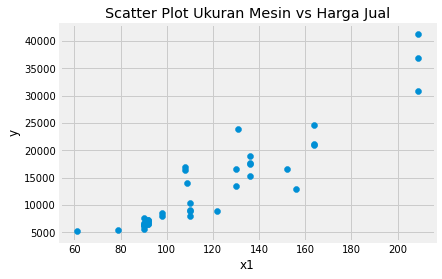

In [6]:
# Untuk memunculkan Scatter Plot X1 vs Y
plt.scatter(df['x1'], df['y'])
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Scatter Plot Ukuran Mesin vs Harga Jual')
plt.show()

##### Hubungan antara x1 dan y linier, semakin besar ukuran mesin maka harga jual semakin tinggi dan sebaliknya
##### Hubungan antara x1 dan y positif, semakin besar x1 maka semakin tinggi y dan sebaliknya

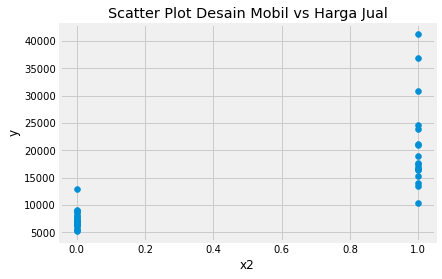

In [7]:
# Untuk memunculkan Scatter Plot X2 vs Y
plt.scatter(df['x2'], df['y'])
plt.xlabel('x2')
plt.ylabel('y')
plt.title('Scatter Plot Desain Mobil vs Harga Jual')
plt.show()

##### Tidak terdapat hubungan antara Desain Mobil dengan harga jual

In [9]:
#Mengitung nilai korelasi pearson
from scipy.stats import pearsonr
# Convert dataframe into series
list1 = df['x1']
list2 = df['y']
corr, _ = pearsonr(list1, list2)
print('Koefisien Pearson: %.5f' % corr)

Koefisien Pearson: 0.92747


##### Jadi, korelasi antara x1/Ukuran Mesin dengan y/Harga Jual menggunakan analisis pearson adalah tinggi, yaitu 0,92747

In [10]:
#Mengitung nilai korelasi pearson
from scipy.stats import pearsonr
# Convert dataframe into series
list1 = df['x2']
list2 = df['y']
corr, _ = pearsonr(list1, list2)
print('Koefisien Pearson: %.5f' % corr)

Koefisien Pearson: 0.77206


##### jadi, korelasi antara x2/Desain mobil dengan y/Harga Jual menggunakan analisis pearson adalah tinggi, yaitu 0,77206

In [11]:
import scipy.stats as stats

#menghitung Korelasi Biserial Poin Desain Mobil VS Harga Jual
stats.pointbiserialr(df['x2'], df['y'])

PointbiserialrResult(correlation=0.772058353582066, pvalue=5.422379333800211e-09)

##### Berdasarkan nilai korelasi Biserial Poin sebesar 0,77205. Maka dapat disimpulkan bahwa variabel Desain Mobil dengan Harga Jual memiliki hubungan korelasi positif yang kuat 

In [12]:
#Memodelkan dengan Regresi Linier Berganda
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
df_with_dummies = pd.get_dummies(data=df, columns=['x2'])
x = df_with_dummies[['x1','x2_0','x2_1']]
y = df_with_dummies['y']
reg_mod = 'y ~ x1+x2_1'
model = smf.ols(formula=reg_mod, data=df_with_dummies).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     151.2
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           1.57e-18
Time:                        00:14:25   Log-Likelihood:                -374.87
No. Observations:                  40   AIC:                             755.7
Df Residuals:                      37   BIC:                             760.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.027e+04   1870.696     -5.489      0.0

##### Berdasarkan hasil diatas, jika Desain Mobil adalah 0. Maka, model regresi yang didapat adalah 𝑦hat = -1.027e+04+182,3231𝑥1+4233,8511(0) --> 𝑦hat = -1.027e+04+182,3231𝑥1
##### Berdasarkan hasil diatas, jika Desain Mobil adalah 1. Maka, model regresi yang didapat adalah 𝑦hat = -1.027e+04-182,3231𝑥1+4233,8511

In [15]:
# Untuk menghasilkan nilai prediksi yhat

prediksi = model.predict(x)
print(prediksi.head())

0    17667.541001
1    17667.541001
2    21678.649850
3    13838.755282
4    18761.479778
dtype: float64


In [16]:
# Untuk menghasilkan nilai residual

residual=model.resid
print(residual.head())

0   -4172.541001
1   -1167.541001
2   -5178.649850
3     111.244718
4   -1311.479778
dtype: float64


#### Melakukan Uji F
##### berdasarkan hasil diatas, didapatkan F-statistics = 151,2 dan p-value sebesar 1,57e-18
##### dengan alfa sebesar 0,05. H0 ditolak jika Fhit>Ftabel, dimana Ftabel = 3,25 atau p-value<0,05 

##### dengan alfa 0,05, nilai Fhitung 151,2 lebih dari Ftabel 3,25 dan p value sebesar 0,00 yang kurang dari 0,05 maka H0 ditolak. Artinya, ada minimal 1 variabel atau lebih yang berpengaruh terhadap variabel dependennya.

#### Mendapatkan R-Square
##### berdasarkan gambar diatas, didaptkan nilai R-Square Adjusted sebesar 0,885 yang artinya 88,5% Harga jual dipengaruhi oleh Ukuran Mesin dan Desain Mobil serta 11,5% lainnya dipengaruhi oleh variabel lainnya yang tidak diketahui atau tidak diteliti.

#### Melakukan Uji T (Ukuran Mesin)
##### berdasarkan gambar diatas, didaptkan bahwa nilai T-statistics untuk variabel Ukuran Mesin adalah 10,004 atau p-value yang didapat 0,000
##### dengan alfa 0,05. H0 ditolak jika Thitung>Ttabel, dimana tTabel = 2,024

##### dengan alfa 0,05, nilai Thitung 10,004 lebih dari Ttabel 2,024 dan p value sebesar 0,000 yang kurang dari 0,05 maka H0 ditolak. Artinya bahwa variabel ukuran mesin berpengaruh signifikan terhadap harga jual.

#### Melakukan Uji T (Desain Mobil)
##### berdasarkan gambar diatas, didapatkan bahwa nilai T-statistics untuk variabel Desain Mobil adalah 3,232 atau p-value yang didapat 0,003
##### dengan alfa 0,05. H0 ditolak jika Thitung>Ttabel, dimana Ttabel = 2,024

##### dengan alfa 0,05, nilai Thitung 3,232 lebih dari Ttabel 2,024 dan p-value sebesar 0,003 yang kurang dari 0,05 maka H0 ditolak. Artinya bahwa variabel desain mobil berpengaruh signifikan terhadap harga jual.

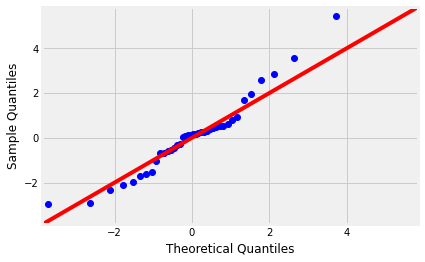

In [30]:
#Memeriksa asumsi residual berdisribusi normal
#Menggambar Plot QQ menggunakan package statmodels

import scipy.stats as stats
fig = sm.qqplot(residual, stats.t, fit=True, line="45")
plt.show()

##### Terlihat bahwa distribusi data residual mendekati garis linier, sehingga dapat disimpulkan bahwa data residual tersebut memenuhi asusmsi bedistribusi normal.

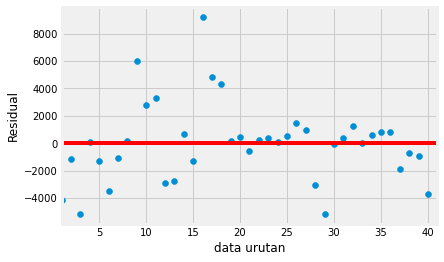

In [31]:
#Plot memeriksa asumsi residual tidak terjadi autokorelasi
urutan_pengamatan=pd.Series(range(1,41)) 
plt.scatter(urutan_pengamatan, residual);
plt.axhline(0, color='red')
plt.xlabel('data urutan');
plt.ylabel('Residual');
plt.xlim([1,41]);

##### Terlihat bahwa  distribusi data residual terhdap plot tidak membentuk pola apapun sehingga dapat disimpulkan bahwa data residual memenuhi asumsi residual, yaitu tidak terjadinya autokorelasi  

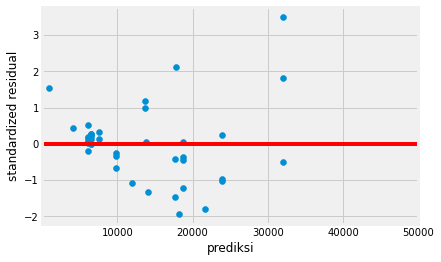

In [36]:
#Plot memeriksa asumsi residual tidak terjadi heteroskedastisitas
influence = model.get_influence()
#menentukan standardized residualnya
std_residual = influence.resid_studentized_internal
plt.scatter(prediksi, std_residual);
plt.axhline(0, color='red')
plt.xlabel('prediksi');
plt.ylabel('standardized residual');
plt.xlim([41,50000]);

##### Terlihat bahwa data varians residual yang diwakilkan oleh standardized residualnya tidak membentuk pola apapun, sehingga dapat diartikan bahwa residual memenuhi asumsi tidak terjadi heteroskedastisitas.

In [24]:
# Pengujian Jarque Bera untuk memeriksa asumsi residual
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(model.resid)
lzip(name, test)

[('Jarque-Bera', 8.392193985676586),
 ('Chi^2 two-tail prob.', 0.015054219030240646),
 ('Skew', 0.7894013958102928),
 ('Kurtosis', 4.594584001104049)]

##### Berdasrkan output diatas, didapatkan nilai statistik uji JB sebesar 8,3921 dan p-value sebesar 0,015.
##### Dengan alfa 0,05. H0 ditolak jika Jb>Chi Square table atau p-value<0,05
##### Berdasarkan uji statistik diatas, didapatkan nilai JB sebesar 8,3921. Dengan alfa 0,05 dan tabel chi square yaitu 5,9914. dan p-value sebesar 0,015<0,05. Artinya tolak H0, artinya residual tidak memenuhi asumsi berdistribusi normal.

In [25]:
#Pengujian Durbin-Watson
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(model.resid)
print(f"Durbin-Watson: {dw}")

Durbin-Watson: 1.1912358784180817


##### Dikarenakan dhitung=1,1912 dimana dhitung<dL maka disimpulkan bahwa H0 ditolak. Sehingga dapat disimpulkan dengan metode durbin watson bahwa pada residual terjadi autokorelasi.

In [27]:
#Pengujian Breush-Pagan
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 11.518745971314566),
 ('p-value', 0.003153088010166664),
 ('f-value', 7.482002030342308),
 ('f p-value', 0.0018673840565722546)]

##### Berdasarkan uji statistik diatas, didapatkan nilai statistik uji breush Pagan sebesar 11,5187  dan p-value sebesar 0,0031.
##### Dengan alfa sebesar 0,05, H0 ditolak jika nilai breush pagan>chi square tabel, atau p-value<0,05. Chi square table=5,991

##### Dikarenakan statistik uji breush pagan 11,5187 kurang dari tabel chi square table, dapat disimpulkan bahwa H0 gagal ditolak dan tidak terjadi heteroskedastisitas pada asumsi  residual  

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Himpunan Variabel independen
X = df[['x1', 'x2']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
print(vif_data)

  feature      VIF
0      x1  2.67189
1      x2  2.67189


##### Berdasarkan hasil output diatas, nilai VIF kedua variabel independen kurang dari 10 dimana artinya tidak terjadi multikolinieritas pada variabel independennya.
 